In [1]:
import pandas as pd
import numpy as np

# Series,DataFrame

In [2]:
s1 = pd.Series([4,7,-5,3])#创建一个series，索引为默认值
print(s1)

0    4
1    7
2   -5
3    3
dtype: int64


In [3]:
s1.values#series的值

array([ 4,  7, -5,  3], dtype=int64)

In [4]:
s2 = pd.Series([4.0,6.5,-0.5,4.2],index=['d','b','a','c'])
print(s2)

d    4.0
b    6.5
a   -0.5
c    4.2
dtype: float64


In [5]:
s2['a']#根据索引取值

-0.5

In [6]:
s2[['a','b','c']]#根据索引取值

a   -0.5
b    6.5
c    4.2
dtype: float64

In [7]:
'b' in s2

True

In [8]:
'e' in s2

False

In [9]:
#Series可以看成是一个定长的有序字典
dic1 = {'apple':5,'pen':3,'applepen':10}
s3 = pd.Series(dic1)
print(s3)

apple        5
pen          3
applepen    10
dtype: int64


In [10]:
#DataFrame
data = {'year':[2014,2015,2016,2017],
        'income':[10000,30000,50000,80000],
        'pay':[5000,20000,30000,30000]
}
df1 = pd.DataFrame(data)
df1

,year,income,pay
0,2014,10000,5000
1,2015,30000,20000
2,2016,50000,30000
3,2017,80000,30000


In [11]:
df2 = pd.DataFrame(np.arange(12).reshape((3,4)))
df2

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [12]:
df3 = pd.DataFrame(np.arange(12).reshape((3,4)),index=['a','c','b'],columns=[2,33,44,5])
df3

,2,33,44,5
a,0,1,2,3
c,4,5,6,7
b,8,9,10,11


In [13]:
df1.columns #列

Index(['year', 'income', 'pay'], dtype='object')

In [14]:
df1.index #行

RangeIndex(start=0, stop=4, step=1)

In [15]:
df1.values

array([[ 2014, 10000,  5000],
       [ 2015, 30000, 20000],
       [ 2016, 50000, 30000],
       [ 2017, 80000, 30000]], dtype=int64)

In [16]:
df1.describe()

,year,income,pay
count,4.000000,4.000000,4.000000
mean,2015.500000,42500.000000,21250.000000
std,1.290994,29860.788112,11814.539066
min,2014.000000,10000.000000,5000.000000
25%,2014.750000,25000.000000,16250.000000
50%,2015.500000,40000.000000,25000.000000
75%,2016.250000,57500.000000,30000.000000
max,2017.000000,80000.000000,30000.000000


In [17]:
df1.T

,0,1,2,3
year,2014,2015,2016,2017
income,10000,30000,50000,80000
pay,5000,20000,30000,30000


In [18]:
df3

,2,33,44,5
a,0,1,2,3
c,4,5,6,7
b,8,9,10,11


In [19]:
df3.sort_index(axis=1)#列排序

,2,5,33,44
a,0,3,1,2
c,4,7,5,6
b,8,11,9,10


In [20]:
df3.sort_index(axis=0)#行排序

,2,33,44,5
a,0,1,2,3
b,8,9,10,11
c,4,5,6,7


In [21]:
df3.sort_values(by=44)

,2,33,44,5
a,0,1,2,3
c,4,5,6,7
b,8,9,10,11


# 数据选择

In [23]:
dates = pd.date_range('20170101',periods=6)
df1 = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
df1

,A,B,C,D
2017-01-01,0,1,2,3
2017-01-02,4,5,6,7
2017-01-03,8,9,10,11
2017-01-04,12,13,14,15
2017-01-05,16,17,18,19
2017-01-06,20,21,22,23


In [24]:
df1['A']#将DataFrame的列获取为一个Series

2017-01-01     0
2017-01-02     4
2017-01-03     8
2017-01-04    12
2017-01-05    16
2017-01-06    20
Freq: D, Name: A, dtype: int32

In [25]:
df1.A

2017-01-01     0
2017-01-02     4
2017-01-03     8
2017-01-04    12
2017-01-05    16
2017-01-06    20
Freq: D, Name: A, dtype: int32

In [26]:
df1[0:2]#取0-1行

,A,B,C,D
2017-01-01,0,1,2,3
2017-01-02,4,5,6,7


In [27]:
df1['20170102':'20170104']

,A,B,C,D
2017-01-02,4,5,6,7
2017-01-03,8,9,10,11
2017-01-04,12,13,14,15


In [28]:
#通过标签选择数据
df1.loc['20170102']

A    4
B    5
C    6
D    7
Name: 2017-01-02 00:00:00, dtype: int32

In [29]:
df1.loc['20170101',['A','C']]

A    0
C    2
Name: 2017-01-01 00:00:00, dtype: int32

In [30]:
df1.loc[:,['A','B']]

,A,B
2017-01-01,0,1
2017-01-02,4,5
2017-01-03,8,9
2017-01-04,12,13
2017-01-05,16,17
2017-01-06,20,21


In [31]:
#通过位置选择数据
df1.iloc[2] #第二行

A     8
B     9
C    10
D    11
Name: 2017-01-03 00:00:00, dtype: int32

In [32]:
df1.iloc[1:3,2:4]

,C,D
2017-01-02,6,7
2017-01-03,10,11


In [33]:
df1.iloc[[1,2,4],[1,3]]

,B,D
2017-01-02,5,7
2017-01-03,9,11
2017-01-05,17,19


In [34]:
#混合标签位置选择
df1.ix[2:4,['A','C']]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,A,C
2017-01-03,8,10
2017-01-04,12,14


In [35]:
df1.ix['20170102':'20170104',2:4]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,C,D
2017-01-02,6,7
2017-01-03,10,11
2017-01-04,14,15


In [36]:
df1.A

2017-01-01     0
2017-01-02     4
2017-01-03     8
2017-01-04    12
2017-01-05    16
2017-01-06    20
Freq: D, Name: A, dtype: int32

In [37]:
df1.A > 6

2017-01-01    False
2017-01-02    False
2017-01-03     True
2017-01-04     True
2017-01-05     True
2017-01-06     True
Freq: D, Name: A, dtype: bool

In [38]:
df1[df1.A>6]

,A,B,C,D
2017-01-03,8,9,10,11
2017-01-04,12,13,14,15
2017-01-05,16,17,18,19
2017-01-06,20,21,22,23


# pandas赋值及操作

In [39]:
dates = np.arange(20170101,20170107)
df1 = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
df1

,A,B,C,D
20170101,0,1,2,3
20170102,4,5,6,7
20170103,8,9,10,11
20170104,12,13,14,15
20170105,16,17,18,19
20170106,20,21,22,23


In [40]:
df1.iloc[2,2]

10

In [41]:
df1.iloc[2,2] = 100
df1

,A,B,C,D
20170101,0,1,2,3
20170102,4,5,6,7
20170103,8,9,100,11
20170104,12,13,14,15
20170105,16,17,18,19
20170106,20,21,22,23


In [42]:
df1.loc[20170102,'B'] = 200
df1

,A,B,C,D
20170101,0,1,2,3
20170102,4,200,6,7
20170103,8,9,100,11
20170104,12,13,14,15
20170105,16,17,18,19
20170106,20,21,22,23


In [43]:
df1[df1.A>10] = 0
df1

,A,B,C,D
20170101,0,1,2,3
20170102,4,200,6,7
20170103,8,9,100,11
20170104,0,0,0,0
20170105,0,0,0,0
20170106,0,0,0,0


In [44]:
df1.A[df1.A==0] = 1
df1

,A,B,C,D
20170101,1,1,2,3
20170102,4,200,6,7
20170103,8,9,100,11
20170104,1,0,0,0
20170105,1,0,0,0
20170106,1,0,0,0


In [45]:
df1['E'] = 10 #添加一列
df1

,A,B,C,D,E
20170101,1,1,2,3,10
20170102,4,200,6,7,10
20170103,8,9,100,11,10
20170104,1,0,0,0,10
20170105,1,0,0,0,10
20170106,1,0,0,0,10


In [46]:
df1['F'] = pd.Series([1,2,3,4,5,6],index=dates)#添加一列
df1

,A,B,C,D,E,F
20170101,1,1,2,3,10,1
20170102,4,200,6,7,10,2
20170103,8,9,100,11,10,3
20170104,1,0,0,0,10,4
20170105,1,0,0,0,10,5
20170106,1,0,0,0,10,6


In [47]:
df1.loc[20170107,['A','B','C']] = [1,2,3]
df1

,A,B,C,D,E,F
20170101,1.0,1.0,2.0,3.0,10.0,1.0
20170102,4.0,200.0,6.0,7.0,10.0,2.0
20170103,8.0,9.0,100.0,11.0,10.0,3.0
20170104,1.0,0.0,0.0,0.0,10.0,4.0
20170105,1.0,0.0,0.0,0.0,10.0,5.0
20170106,1.0,0.0,0.0,0.0,10.0,6.0
20170107,1.0,2.0,3.0,NaN,NaN,NaN


In [48]:
s1 = pd.Series([1,2,3,4,5,6],index=['A','B','C','D','E','F'])
s1.name = 'S1'
df2 = df1.append(s1)
df2

,A,B,C,D,E,F
20170101,1.0,1.0,2.0,3.0,10.0,1.0
20170102,4.0,200.0,6.0,7.0,10.0,2.0
20170103,8.0,9.0,100.0,11.0,10.0,3.0
20170104,1.0,0.0,0.0,0.0,10.0,4.0
20170105,1.0,0.0,0.0,0.0,10.0,5.0
20170106,1.0,0.0,0.0,0.0,10.0,6.0
20170107,1.0,2.0,3.0,NaN,NaN,NaN
S1,1.0,2.0,3.0,4.0,5.0,6.0


In [49]:
df1.insert(1,'G',df2['E'])#在第一列插入索引为G的df2中的E列
df1

,A,G,B,C,D,E,F
20170101,1.0,10.0,1.0,2.0,3.0,10.0,1.0
20170102,4.0,10.0,200.0,6.0,7.0,10.0,2.0
20170103,8.0,10.0,9.0,100.0,11.0,10.0,3.0
20170104,1.0,10.0,0.0,0.0,0.0,10.0,4.0
20170105,1.0,10.0,0.0,0.0,0.0,10.0,5.0
20170106,1.0,10.0,0.0,0.0,0.0,10.0,6.0
20170107,1.0,NaN,2.0,3.0,NaN,NaN,NaN


In [50]:
g = df1.pop('G')#弹出G列
df1.insert(6,'G',g)#在最后插入
df1

,A,B,C,D,E,F,G
20170101,1.0,1.0,2.0,3.0,10.0,1.0,10.0
20170102,4.0,200.0,6.0,7.0,10.0,2.0,10.0
20170103,8.0,9.0,100.0,11.0,10.0,3.0,10.0
20170104,1.0,0.0,0.0,0.0,10.0,4.0,10.0
20170105,1.0,0.0,0.0,0.0,10.0,5.0,10.0
20170106,1.0,0.0,0.0,0.0,10.0,6.0,10.0
20170107,1.0,2.0,3.0,NaN,NaN,NaN,NaN


In [51]:
del df1['G']#删除G列
df1

,A,B,C,D,E,F
20170101,1.0,1.0,2.0,3.0,10.0,1.0
20170102,4.0,200.0,6.0,7.0,10.0,2.0
20170103,8.0,9.0,100.0,11.0,10.0,3.0
20170104,1.0,0.0,0.0,0.0,10.0,4.0
20170105,1.0,0.0,0.0,0.0,10.0,5.0
20170106,1.0,0.0,0.0,0.0,10.0,6.0
20170107,1.0,2.0,3.0,NaN,NaN,NaN


In [52]:
df2 = df1.drop(['A','B'],axis=1)#删除AB列
df1

,A,B,C,D,E,F
20170101,1.0,1.0,2.0,3.0,10.0,1.0
20170102,4.0,200.0,6.0,7.0,10.0,2.0
20170103,8.0,9.0,100.0,11.0,10.0,3.0
20170104,1.0,0.0,0.0,0.0,10.0,4.0
20170105,1.0,0.0,0.0,0.0,10.0,5.0
20170106,1.0,0.0,0.0,0.0,10.0,6.0
20170107,1.0,2.0,3.0,NaN,NaN,NaN


In [53]:
df2

,C,D,E,F
20170101,2.0,3.0,10.0,1.0
20170102,6.0,7.0,10.0,2.0
20170103,100.0,11.0,10.0,3.0
20170104,0.0,0.0,10.0,4.0
20170105,0.0,0.0,10.0,5.0
20170106,0.0,0.0,10.0,6.0
20170107,3.0,NaN,NaN,NaN


In [54]:
df2 = df1.drop([20170101,20170102],axis=0)#删除20170101,20170102行
df1

,A,B,C,D,E,F
20170101,1.0,1.0,2.0,3.0,10.0,1.0
20170102,4.0,200.0,6.0,7.0,10.0,2.0
20170103,8.0,9.0,100.0,11.0,10.0,3.0
20170104,1.0,0.0,0.0,0.0,10.0,4.0
20170105,1.0,0.0,0.0,0.0,10.0,5.0
20170106,1.0,0.0,0.0,0.0,10.0,6.0
20170107,1.0,2.0,3.0,NaN,NaN,NaN


In [55]:
df2

,A,B,C,D,E,F
20170103,8.0,9.0,100.0,11.0,10.0,3.0
20170104,1.0,0.0,0.0,0.0,10.0,4.0
20170105,1.0,0.0,0.0,0.0,10.0,5.0
20170106,1.0,0.0,0.0,0.0,10.0,6.0
20170107,1.0,2.0,3.0,NaN,NaN,NaN


# 处理丢失数据

In [57]:
dates = np.arange(20170101,20170105)
df1 = pd.DataFrame(np.arange(12).reshape((4,3)),index=dates,columns=['A','B','C'])
df1

,A,B,C
20170101,0,1,2
20170102,3,4,5
20170103,6,7,8
20170104,9,10,11


In [58]:
dates = np.arange(20170101,20170105)
df1 = pd.DataFrame(np.arange(12).reshape((4,3)),index=dates,columns=['A','B','C'])
df1

,A,B,C
20170101,0,1,2
20170102,3,4,5
20170103,6,7,8
20170104,9,10,11


In [59]:
s1 = pd.Series([3,4,6],index=dates[:3])
s2 = pd.Series([32,5,2],index=dates[1:])
df2['D'] = s1
df2['E'] = s2
df2

,A,B,C,D,E,F
20170103,8.0,9.0,100.0,6.0,5.0,3.0
20170104,1.0,0.0,0.0,NaN,2.0,4.0
20170105,1.0,0.0,0.0,NaN,NaN,5.0
20170106,1.0,0.0,0.0,NaN,NaN,6.0
20170107,1.0,2.0,3.0,NaN,NaN,NaN


In [60]:
df2.dropna(axis=0,how='any') #axis=[0,1] 0代表行，1代表列。how=['any','all'] any任意一个或多个 all全部

,A,B,C,D,E,F
20170103,8.0,9.0,100.0,6.0,5.0,3.0


In [61]:
df2.dropna(axis=1,how='any') #axis=[0,1] 0代表行，1代表列。how=['any','all'] any任意一个或多个 all全部

,A,B,C
20170103,8.0,9.0,100.0
20170104,1.0,0.0,0.0
20170105,1.0,0.0,0.0
20170106,1.0,0.0,0.0
20170107,1.0,2.0,3.0


In [62]:
df2.fillna(value=0)#把空值赋值为0

,A,B,C,D,E,F
20170103,8.0,9.0,100.0,6.0,5.0,3.0
20170104,1.0,0.0,0.0,0.0,2.0,4.0
20170105,1.0,0.0,0.0,0.0,0.0,5.0
20170106,1.0,0.0,0.0,0.0,0.0,6.0
20170107,1.0,2.0,3.0,0.0,0.0,0.0


In [63]:
df2.isnull()#查看空值

,A,B,C,D,E,F
20170103,False,False,False,False,False,False
20170104,False,False,False,True,False,False
20170105,False,False,False,True,True,False
20170106,False,False,False,True,True,False
20170107,False,False,False,True,True,True


In [64]:
np.any(df2.isnull())#只要有一个或多个空值就会返回true

True

In [65]:
np.all(df2.isnull())#所有为空值才返回true

False

In [66]:
file = pd.read_csv('E:\\300 数据时代\\数据分析\\people.csv',engine = "python")
file

,地点,名字,职位,工资,在职情况
0,北京,小红,渠道合作经理,15000,在职
1,北京,小明,行政专员,8000,离职
2,北京,小白,行政专员,9000,在职
3,上海,小绿,商户经理,12000,在职
4,上海,小黄,商户经理,10000,离职
5,上海,小黑,团队长,12000,在职
6,广州,小紫,渠道合作主管,20000,在职
7,广州,小粉,渠道合作主管,20000,在职
8,广州,小青,经理,10000,离职
9,广州,小蓝,团队长,13000,在职


In [67]:
file.iloc[2,0] = '深圳'
file

,地点,名字,职位,工资,在职情况
0,北京,小红,渠道合作经理,15000,在职
1,北京,小明,行政专员,8000,离职
2,深圳,小白,行政专员,9000,在职
3,上海,小绿,商户经理,12000,在职
4,上海,小黄,商户经理,10000,离职
5,上海,小黑,团队长,12000,在职
6,广州,小紫,渠道合作主管,20000,在职
7,广州,小粉,渠道合作主管,20000,在职
8,广州,小青,经理,10000,离职
9,广州,小蓝,团队长,13000,在职


In [68]:
file.to_csv('E:\\300 数据时代\\数据分析\\people2.csv',encoding = "gbk")

In [69]:
df1 = pd.DataFrame(np.arange(12).reshape((3,4)),columns=['a','b','c','d'])
df2 = pd.DataFrame(np.arange(12,24).reshape((3,4)),columns=['a','b','c','d'])
df3 = pd.DataFrame(np.arange(24,36).reshape((3,4)),columns=['a','b','c','d'])
print(df1)
print(df2)
print(df3)

   a  b   c   d
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
    a   b   c   d
0  12  13  14  15
1  16  17  18  19
2  20  21  22  23
    a   b   c   d
0  24  25  26  27
1  28  29  30  31
2  32  33  34  35


In [70]:
df4 = pd.concat([df1,df2,df3],axis=0)#纵向合并
df4

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
0,12,13,14,15
1,16,17,18,19
2,20,21,22,23
0,24,25,26,27
1,28,29,30,31
2,32,33,34,35


In [71]:
df4 = pd.concat([df1,df2,df3],axis=0,ignore_index=True)#纵向合并，不考虑原来的index
df4

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19
5,20,21,22,23
6,24,25,26,27
7,28,29,30,31
8,32,33,34,35


In [72]:
df5 = pd.concat([df1,df2,df3],axis=1)#横向合并
df5

,a,b,c,d,a,b,c,d,a,b,c,d
0,0,1,2,3,12,13,14,15,24,25,26,27
1,4,5,6,7,16,17,18,19,28,29,30,31
2,8,9,10,11,20,21,22,23,32,33,34,35


In [73]:
df1 = pd.DataFrame(np.arange(12).reshape((3,4)),columns=['a','b','c','f'])
df2 = pd.DataFrame(np.arange(12,24).reshape((3,4)),columns=['a','c','d','e'])
print(df1)
print(df2)

   a  b   c   f
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
    a   c   d   e
0  12  13  14  15
1  16  17  18  19
2  20  21  22  23


In [74]:
df6 = pd.concat([df1,df2],join='outer',ignore_index=True)#合并两个表，缺少的部分填充NaN
df6

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,a,b,c,d,e,f
0,0,1.0,2,NaN,NaN,3.0
1,4,5.0,6,NaN,NaN,7.0
2,8,9.0,10,NaN,NaN,11.0
3,12,NaN,13,14.0,15.0,NaN
4,16,NaN,17,18.0,19.0,NaN
5,20,NaN,21,22.0,23.0,NaN


In [75]:
df7 = pd.concat([df1,df2],join='inner',ignore_index=True)#合并两个表，缺少的部分去掉
df7

,a,c
0,0,2
1,4,6
2,8,10
3,12,13
4,16,17
5,20,21


In [76]:
df1 = pd.DataFrame(np.arange(12).reshape((3,4)),columns=['a','b','c','f'])
df2 = pd.DataFrame(np.arange(12,24).reshape((4,3)),columns=['a','c','d'])
print(df1)
print(df2)

   a  b   c   f
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11
    a   c   d
0  12  13  14
1  15  16  17
2  18  19  20
3  21  22  23


In [77]:
df8 = pd.concat([df1,df2],axis=1,join_axes=[df1.index])#横向合并，index使用df1的index
df8

,a,b,c,f,a,c,d
0,0,1,2,3,12,13,14
1,4,5,6,7,15,16,17
2,8,9,10,11,18,19,20


In [78]:
df8 = pd.concat([df1,df2],axis=1)#横向合并
df8

,a,b,c,f,a,c,d
0,0.0,1.0,2.0,3.0,12,13,14
1,4.0,5.0,6.0,7.0,15,16,17
2,8.0,9.0,10.0,11.0,18,19,20
3,NaN,NaN,NaN,NaN,21,22,23


# pandas合并merge

In [79]:
left = pd.DataFrame({'key':['K0','K1','K2','K3'],
                     'A':['A0','A1','A2','A3'],
                     'B':['B0','B1','B2','B3']})

right = pd.DataFrame({'key':['K0','K1','K2','K3'],
                     'C':['C0','C1','C2','C3'],
                     'D':['D0','D1','D2','D3']})

print(left)
print(right)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [80]:
res = pd.merge(left,right,on='key')
res

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [81]:
left = pd.DataFrame({'key1':['K0','K0','K1','K2'],
                     'key2':['K0','K1','K0','K1'],
                     'A':['A0','A1','A2','A3'],
                     'B':['B0','B1','B2','B3']})

right = pd.DataFrame({'key1':['K0','K1','K1','K3'],
                      'key2':['K0','K0','K0','K0'],
                     'C':['C0','C1','C2','C3'],
                     'D':['D0','D1','D2','D3']})

print(left)
print(right)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K3   K0  C3  D3


In [82]:
#how = ['left','right','inner','outer']
res = pd.merge(left,right,on=['key1','key2'],how='outer')#how默认inner
res

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K3,K0,NaN,NaN,C3,D3


In [83]:
#how = ['left','right','inner','outer']
res = pd.merge(left,right,on=['key1','key2'],how='inner')#how默认inner
res

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [84]:
#how = ['left','right','inner','outer']
res = pd.merge(left,right,on=['key1','key2'],how='left')#how默认inner
res

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [85]:
#how = ['left','right','inner','outer']
res = pd.merge(left,right,on=['key1','key2'],how='outer',indicator=True)#显示merge信息
res

,key1,key2,A,B,C,D,_merge
0,K0,K0,A0,B0,C0,D0,both
1,K0,K1,A1,B1,NaN,NaN,left_only
2,K1,K0,A2,B2,C1,D1,both
3,K1,K0,A2,B2,C2,D2,both
4,K2,K1,A3,B3,NaN,NaN,left_only
5,K3,K0,NaN,NaN,C3,D3,right_only


In [86]:
#how = ['left','right','inner','outer']
res = pd.merge(left,right,on=['key1','key2'],how='outer',indicator=True)#显示merge信息
res

,key1,key2,A,B,C,D,_merge
0,K0,K0,A0,B0,C0,D0,both
1,K0,K1,A1,B1,NaN,NaN,left_only
2,K1,K0,A2,B2,C1,D1,both
3,K1,K0,A2,B2,C2,D2,both
4,K2,K1,A3,B3,NaN,NaN,left_only
5,K3,K0,NaN,NaN,C3,D3,right_only


In [87]:
left = pd.DataFrame({'A':['A0','A1','A2'],
                     'B':['B0','B1','B2']},
                     index = ['K0','K1','K2'])
right = pd.DataFrame({'C':['C0','C2','C3'],
                      'D':['D0','D2','D3']},
                      index=['K0','K2','K3'])
print(left)
print(right)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


In [88]:
res = pd.merge(left,right,left_index=True,right_index=True,how='outer')
res

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [89]:
boys = pd.DataFrame({'k':['K0','K1','K2'],'age':[1,2,3]})

girls = pd.DataFrame({'k':['K0','K0','K3'],'age':[4,5,6]})

print(boys)
print(girls)

    k  age
0  K0    1
1  K1    2
2  K2    3
    k  age
0  K0    4
1  K0    5
2  K3    6


In [90]:
res = pd.merge(boys,girls,on='k',suffixes=['_boy','_girl'],how='outer')
res

,k,age_boy,age_girl
0,K0,1.0,4.0
1,K0,1.0,5.0
2,K1,2.0,NaN
3,K2,3.0,NaN
4,K3,NaN,6.0


# plot

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

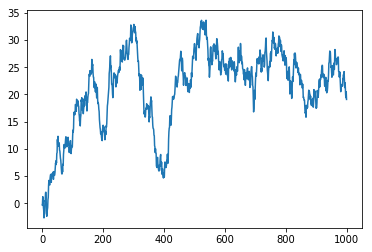

In [94]:
data = pd.Series(np.random.randn(1000),index=np.arange(1000))
data = data.cumsum()
data.plot()
plt.show()

In [95]:
data = pd.DataFrame(np.random.randn(1000,4),index=np.arange(1000),columns=['A','B','C','D'])
data = data.cumsum()
print(data.head())

          A         B         C         D
0 -0.258852  1.236215  0.221814  0.331324
1  0.332410  1.552281 -0.142814  0.479721
2  1.820376  1.977103  1.462824  1.028817
3  3.909115  2.151608 -0.944214  2.415092
4  4.719178  2.144615 -1.638331  1.432857


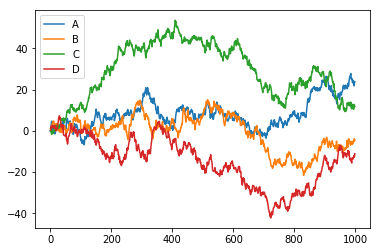

In [96]:
data.plot()
plt.show()

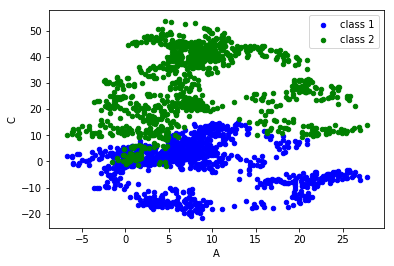

In [97]:
ax = data.plot.scatter(x='A',y='B',color='Blue',label='class 1')
data.plot.scatter(x='A',y='C',color='Green',label='class 2',ax=ax)
plt.show()